In [156]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"


# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
merge_data = pd.merge(ride_data, city_data, on="city", how='left')
# Display the data table for preview

#remove duplicate ride id
merge_data.drop_duplicates("ride_id")
merge_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [146]:
groupby_type = merge_data.groupby("type")
city_type = groupby_type.sum()

In [147]:
drivers_grouped = city_data.groupby("type")
total_drivers_type = drivers_grouped.sum()
total_drivers = total_drivers_type["driver_count"]

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [148]:
colors = ["Gold", "SkyBlue", "Coral"]

In [149]:
type_index = merge_data.set_index("type")

In [158]:
scatter_urban = type_index.loc["Urban", ["city", "date", "fare", "ride_id", "driver_count"]]
scatter_suburban = type_index.loc["Suburban", ["city", "date", "fare", "ride_id", "driver_count"]]
scatter_rural = type_index.loc["Rural", ["city", "date", "fare", "ride_id", "driver_count"]]

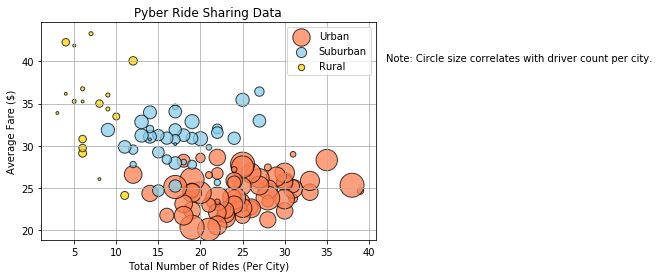

In [151]:
average_urban = scatter_urban.groupby("city").mean()
x_axis_urban = scatter_urban["city"].value_counts()
y_axis_urban = round(average_urban["fare"],2)
z_value_urban = scatter_urban["driver_count"]
urban_world = plt.scatter(x_axis_urban, y_axis_urban, marker="o", facecolors="Coral", edgecolors="black", s=(z_value_urban)*8, alpha=0.75, label="Urban")

average_suburban = scatter_suburban.groupby("city").mean()
x_axis_suburban = scatter_suburban["city"].value_counts()
y_axis_suburban = round(average_suburban["fare"],2)
z_value_suburban = scatter_suburban["driver_count"]
suburban_world = plt.scatter(x_axis_suburban, y_axis_suburban, marker="o", facecolors="SkyBlue", edgecolors="black", s=(z_value_suburban)*8, alpha=0.75, label="Suburban")

average_rural = scatter_rural.groupby("city").mean()
x_axis_rural = scatter_rural["city"].value_counts()
y_axis_rural = round(average_rural["fare"],2)
z_value_rural = scatter_rural["driver_count"]
rural_world = plt.scatter(x_axis_rural, y_axis_rural, marker="o", facecolors="Gold", edgecolors="black", s=(z_value_rural)*8, alpha=0.75, label="Rural")


plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.legend(loc="best")
plt.grid()
plt.text(42, 40, "Note: Circle size correlates with driver count per city.")
plt.show()

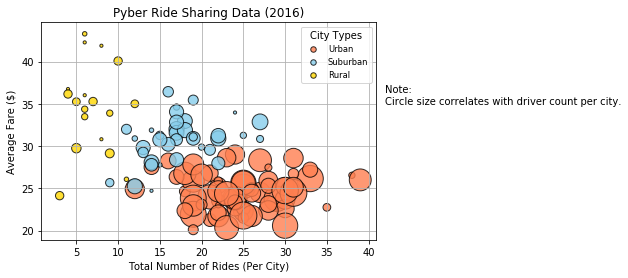

In [3]:
# Show plot

## Total Fares by City Type

In [152]:
# Calculate Type Percents

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
explode = (0, 0, 0.1)
# Save Figure
fare_amount = city_type["fare"]

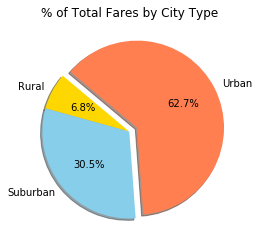

In [153]:
plt.pie(fare_amount, labels=labels, explode=explode, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")
plt.show()

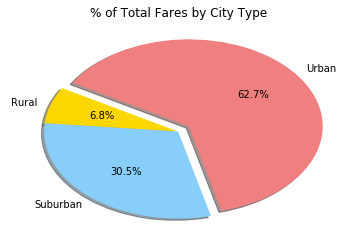

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

In [163]:
total_urban = len(scatter_urban["ride_id"])
total_suburban = len(scatter_suburban["ride_id"])
total_rural = len(scatter_rural["ride_id"])

total_rides = [total_rural, total_suburban, total_urban]

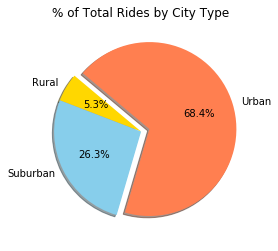

In [164]:
plt.pie(total_rides, labels=labels, explode=explode, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")
plt.show()

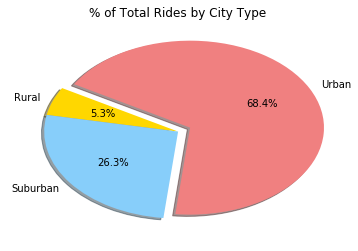

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

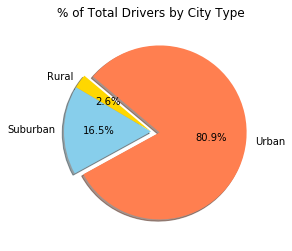

In [154]:
plt.pie(total_drivers, labels=labels, explode=explode, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")
plt.show()

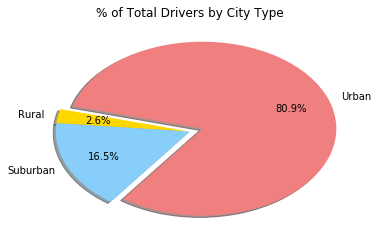

In [6]:
# Show Figure
plt.show()